
# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies released between 1960 and 2015. Collected from The Movie Database (TMDb), it also includes user ratings and popularities. This report aims at conducting exploratory data analysis to answer the questions below:

1. <a href="#question1">What are the average popularities of movies according to budget levels?</a>
2. <a href="#question2">What are the profit trends of movies from year to year?</a>
3. <a href="#question3">What are the average runtimes of movies over the years?</a>
4. <a href="#question4">Which are the 5 cheapest and most expensive profitable movies of all time?</a>


In [20]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime
import seaborn as sns

df = pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling

> **Key notes:**: In this section of the report, the following work will be done: load the data; check for cleanliness; trim and clean dataset for analysis.

### General Properties

In [21]:
# Load your data and print out a few lines. Perform operations to inspect data

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [22]:
# return a tuple of the dimensions of the dataframe

df.shape

(10866, 21)

In [23]:
# print the column labels in the dataframe

for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [24]:
# return the datatypes of the columns

df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [25]:
# check for duplicates in the data

sum(df.duplicated())

1

In [26]:
#  check if any value is NaN in DataFrame and in how many columns

df.isnull().any().any(), sum(df.isnull().any())

(True, 9)

In [27]:
# displays a concise summary of the dataframe
# including the number of non-null values in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [28]:
# Generates descriptive statistics, excluding NaN values

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

In [29]:
# drop duplicates
# confirm correction

df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [30]:
# list of columns that are to be deleted/dropped
col = ['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage',  'tagline', 'keywords', 'overview']

# deleting the columns
df.drop(col, axis = 1, inplace = True)

#checking to see if the columns have been deleted
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [31]:
# Changing datatype of `release_date` column
df['release_date'] = pd.to_datetime(df['release_date'])

In [32]:
# check if the change has taken place successfully
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [33]:
# Handling 0 values in `budget`, `revenue` and `runtime` columns
# Making a list of the 3 columns
temp_col = ['budget', 'revenue', 'runtime']

# Replacing all the 0 values with NaN
df[temp_col] = df[temp_col].replace(0, np.NAN)

In [34]:
# Dropping/Deleting all the NaN values
# Subset helps to define in which columns to look for missing values
df.dropna(subset = temp_col, inplace = True)
rows, col = df.shape

<a id='eda'></a>

## Exploratory Data Analysis

>Let's start with the exploration! :)

<a id='question1'></a>

### 1. What are the average popularities of movies according to budget levels?

In [35]:
# First we need to make columns for budget ranges
# We use the cut methods of the pandas library to do so
df['budget_ranges'] = pd.cut(df['budget'], df['budget'].describe()[3:8], labels = ['Low', 'Medium', 'Moderately High', 'High'])

In [36]:
# Now we find out the average popularities of each level
df.groupby('budget_ranges')['popularity'].mean()

budget_ranges
Low                0.686413
Medium             0.951718
Moderately High    1.142414
High               2.080911
Name: popularity, dtype: float64

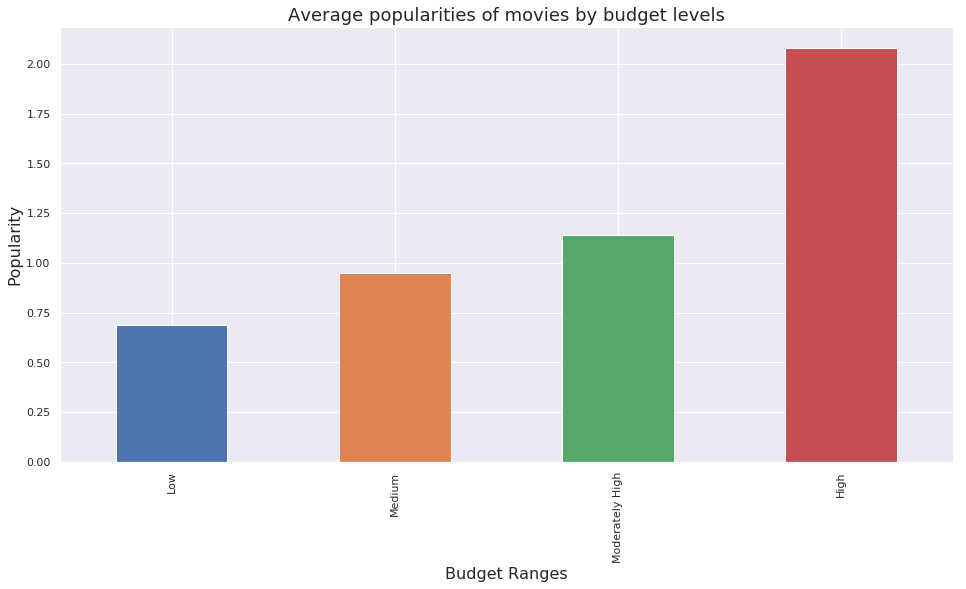

In [37]:
# Plotting the above information in a bar graph
sns.set()
df.groupby('budget_ranges')['popularity'].mean().plot(kind = 'bar', figsize = (16, 8))

# Setting the title of the plot
plt.title('Average popularities of movies by budget levels', fontsize = 18)

# Setting the x and y axis labels
plt.xlabel('Budget Ranges', fontsize = 16)
plt.ylabel('Popularity', fontsize = 16);

<a id='question2'></a>

### 2. What are profit trends from year to year?

In [38]:
# First we need to insert a column for the profit/loss value of each movie
df.insert(3, 'profit_loss', df['revenue'] - df['budget'])

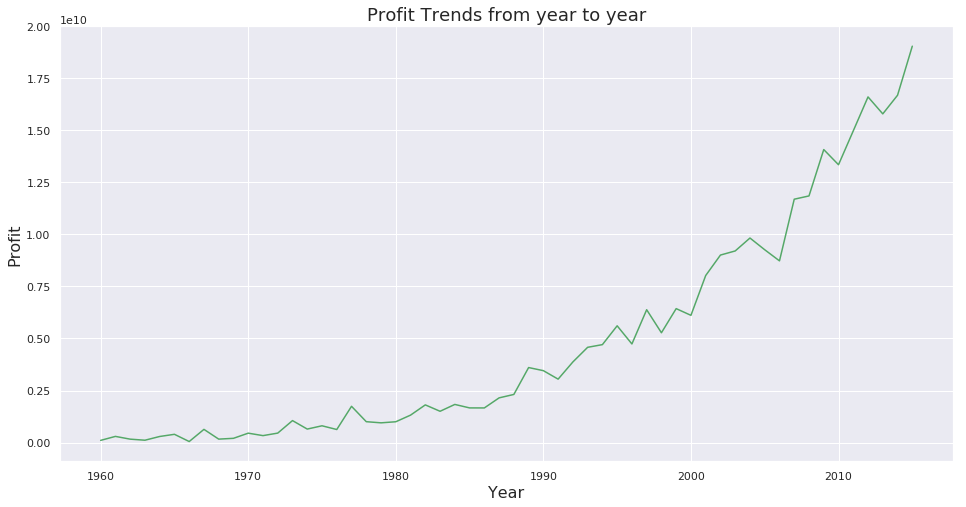

In [39]:
df.groupby('release_year')['profit_loss'].sum().plot(kind = 'line', figsize = (16, 8), color = 'g')
plt.title('Profit Trends from year to year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Profit', fontsize = 16);

<a id='question3'></a>

### 3. What are the average runtimes of movies over the years?

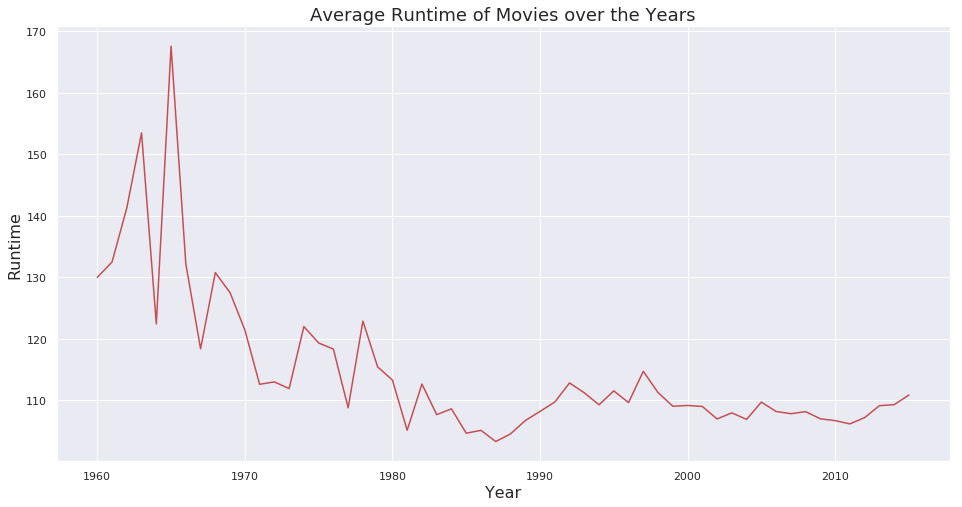

In [40]:
df.groupby('release_year')['runtime'].mean().plot(kind='line', figsize = (16, 8), color = 'r')
plt.title('Average Runtime of Movies over the Years', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Runtime', fontsize = 16);

<a id='question4'></a>

### 4. Which are the 5 cheapest and most expensive profitable movies of all time?

>For this we shall set a standard value of profit which has to be met, that value will be $50,000,000

In [41]:
# creating a list of columns that will be viewed
col = ['original_title', 'cast', 'director', 'budget', 'revenue', 'profit_loss']

# Using query function to show records of movies which have a profit of more than $50,000,000
# Also using sort_values function to make sure it is sorted according to the budget column

df.query('profit_loss>50000000')[col].sort_values('budget', ascending = False).head(5)

,original_title,cast,director,budget,revenue,profit_loss
3375,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,380000000.0,1.021683e+09,6.416830e+08
7387,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,300000000.0,9.610000e+08,6.610000e+08
14,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,280000000.0,1.405036e+09,1.125036e+09
6570,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,270000000.0,3.910812e+08,1.210812e+08
1929,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,260000000.0,5.917949e+08,3.317949e+08


In [42]:
df.query('profit_loss>50000000')[col].sort_values('budget', ascending = True).head(5)

,original_title,cast,director,budget,revenue,profit_loss
10495,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113.0,115103979.0,115103866.0
7447,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,15000.0,193355800.0,193340800.0
2449,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,25000.0,248000000.0,247975000.0
7057,Open Water,Blanchard Ryan|Daniel Travis|Saul Stein|Michae...,Chris Kentis,130000.0,54667954.0,54537954.0
10759,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,John Carpenter,300000.0,70000000.0,69700000.0


<a id='conclusions'></a>
## Conclusions

> **Question 1**: 
It can be observed that movies with a higher budget range tend to be more popular with the audience.

> **Question 2**:
Profits have increased exponentially with each passing year especially after the beginning of the 21st century.

> **Question 3**:
The runtime of movies has decreased with each passsing year. It experienced a hike during the 60s but has then steadily decreased over the years. The lowest was around 100-110 mintues. Presently, movies tend to last around the 110 minute mark.

